**Лабораторная работа №11 “Реализация криптографических атак с помощью машинного обучения на физически неклонируемые функции”**

Долматович Алина, 858641

Сформулируйте задачу в терминах машинного обучения.


**Задача:** Обучить модель машинного обучения таким образом, чтобы она смогла предсказывать выходное значение  (Response, R) по запросу (Challenge, CH)

In [48]:
import pandas
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
import sklearn.cross_validation
from sklearn.metrics import accuracy_score, f1_score, log_loss, recall_score
import matplotlib.pyplot as pyplot

Обучите модель, которая могла бы предсказывать ответы по запросам, которых нет в обучающей выборке.


In [2]:
def getData(fileName, rowsCount=500):
    data = pandas.read_csv(fileName, sep=" ", header=None, nrows=rowsCount)
    symbolsCount = int(fileName.replace("Base", "").replace(".txt", ""))

    x = np.array(list(data[0].apply(str).map(lambda x: np.array(map(int, (symbolsCount - len(x)) * "0" + x))).squeeze().values))

    y = data[1].values

    trainX, testX, trainY, testY = sklearn.cross_validation.train_test_split(x, y, test_size=0.20, random_state=5)

    return trainX, testX, trainY, testY
    
trainX, testX, trainY, testY = getData("Base128.txt")
print(trainX.shape, trainY.shape)
print(testX.shape, testY.shape)

((400, 128), (400,))
((100, 128), (100,))


Применить как минимум 3 различных алгоритма (например, метод опорных векторов, логистическая регрессия и градиентный бустинг).


In [3]:
def fitModel(algoritm, x, y):
    return algoritm.fit(x, y)

def getModels(x, y):
    algoritms = [KNeighborsClassifier(), DecisionTreeClassifier(), GradientBoostingClassifier()]
    models = []
    for algoritm in algoritms:
        model = fitModel(algoritm, x, y)
        models.append(model)
    return models

models = getModels(trainX, trainY)

In [4]:
print models

[KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'), DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'), GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)]


Какая метрика наиболее подходит для оценки качества алгоритма?


Какой наибольшей доли правильных ответов (Accuracy) удалось достичь?


In [5]:
def getMetrics(models, testX, testY):
    metrics = [accuracy_score, f1_score, log_loss, recall_score]
    
    results = dict()

    for model in models:
        print "\n", type(model)
        predict = model.predict(testX)
        metricsValue = []
        for metric in metrics:
            print str(metric), "=========>", metric(testY, predict)
            metricsValue.append(metric(testY, predict))
        results[str(type(model))] = metricsValue
    return results
            
metrics = getMetrics(models, testX, testY)


<class 'sklearn.neighbors.classification.KNeighborsClassifier'>
<function accuracy_score at 0x1a1597b5f0> =========> 0.55
<function f1_score at 0x1a1597b8c0> =========> 0.68085106383
<function log_loss at 0x1a1597bc80> =========> 15.5427212408
<function recall_score at 0x1a1597bb18> =========> 0.813559322034

<class 'sklearn.tree.tree.DecisionTreeClassifier'>
<function accuracy_score at 0x1a1597b5f0> =========> 0.58
<function f1_score at 0x1a1597b8c0> =========> 0.671875
<function log_loss at 0x1a1597bc80> =========> 14.5064939812
<function recall_score at 0x1a1597bb18> =========> 0.728813559322

<class 'sklearn.ensemble.gradient_boosting.GradientBoostingClassifier'>
<function accuracy_score at 0x1a1597b5f0> =========> 0.55
<function f1_score at 0x1a1597b8c0> =========> 0.676258992806
<function log_loss at 0x1a1597bc80> =========> 15.5427132449
<function recall_score at 0x1a1597bb18> =========> 0.796610169492


Какой размер обучающей выборки необходим, чтобы достигнуть доли правильных ответов минимум 0.95?


In [6]:
def investigation(rowsCount):
    trainX, testX, trainY, testY = getData("Base128.txt", rowsCount=rowsCount)
    models = getModels(trainX, trainY)
    metrics = getMetrics(models, testX, testY)
    return metrics

Как зависит доля правильных ответов от N?


In [7]:
history = dict()
nCounts = [100, 1000, 10000, 20000, 30000]
for n in nCounts:
    print "\n", n
    history[n] = investigation(n)


100

<class 'sklearn.neighbors.classification.KNeighborsClassifier'>
<function accuracy_score at 0x1a1597b5f0> =========> 0.65
<function f1_score at 0x1a1597b8c0> =========> 0.758620689655
<function log_loss at 0x1a1597bc80> =========> 12.0887316577
<function recall_score at 0x1a1597bb18> =========> 0.785714285714

<class 'sklearn.tree.tree.DecisionTreeClassifier'>
<function accuracy_score at 0x1a1597b5f0> =========> 0.7
<function f1_score at 0x1a1597b8c0> =========> 0.8125
<function log_loss at 0x1a1597bc80> =========> 10.3618328178
<function recall_score at 0x1a1597bb18> =========> 0.928571428571

<class 'sklearn.ensemble.gradient_boosting.GradientBoostingClassifier'>
<function accuracy_score at 0x1a1597b5f0> =========> 0.65
<function f1_score at 0x1a1597b8c0> =========> 0.774193548387
<function log_loss at 0x1a1597bc80> =========> 12.0887716376
<function recall_score at 0x1a1597bb18> =========> 0.857142857143

1000

<class 'sklearn.neighbors.classification.KNeighborsClassifier'>
<f

Ответы на вопросы представьте в виде графиков.


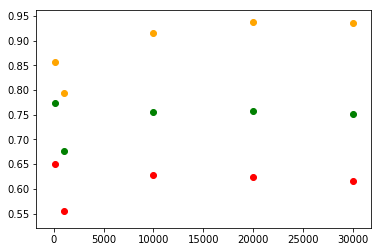

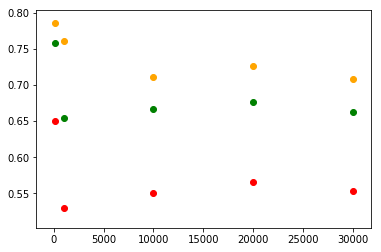

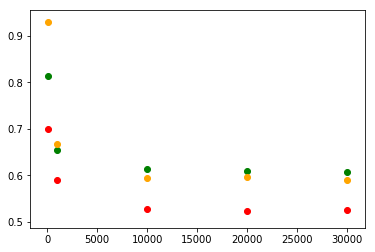

In [47]:
originalKeys = history.values()[0].keys()

accuracy_score_values = dict()
f1_score_values = dict()
log_loss_values = dict()
recall_score_values = dict()

for key in originalKeys:
    for n in history:
        values = history[n][key]
        accuracy_score_values[n] = values[0]
        f1_score_values[n] = values[1]
        recall_score_values[n] = values[3]
        
    pyplot.scatter(accuracy_score_values.keys(), accuracy_score_values.values(), c="red")
    pyplot.scatter(f1_score_values.keys(), f1_score_values.values(), c="green")
    pyplot.scatter(recall_score_values.keys(), recall_score_values.values(), c="orange")
    pyplot.show()